# <center>Visualization using Line Plots</center>

## The Dataset: Immigration to Canada from 1980 to 2013

**Source :**  [International migration flows to and from selected countries - The 2015 revision.](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml)

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [71]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'
df = pd.read_excel(path,sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [72]:
df_can = df.drop(['Type','Coverage','AREA','REG','DEV'],axis=1)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [73]:
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [74]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [75]:
#check missing values
missing_values = df_can.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [76]:
years = list(map(str, range(1980, 2014)))

In [77]:
df_can.columns = list(map(str, df_can.columns))

In [78]:
df_can[df_can['Country'] == 'Japan'].index

Int64Index([87], dtype='int64')

In [79]:
# df_can.columns.tolist()
# df_can.index.tolist()

In [80]:
df_can.iloc[87, [36,37]]

2012    1214
2013     982
Name: 87, dtype: object

In [81]:
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [82]:
df_can.set_index('Country',inplace=True)

In [83]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [84]:
df_can.index.name = None

## Line Plots

**Case Study**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

In [139]:
haiti = df_can.loc[['Haiti'],years]
haiti.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152


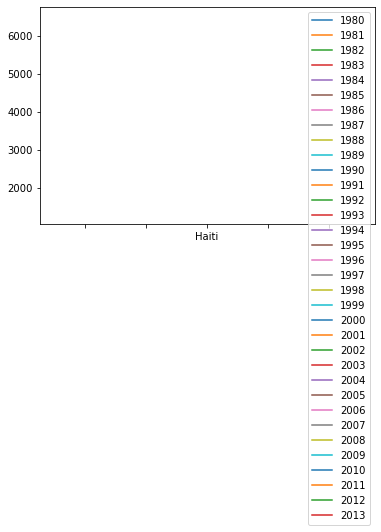

In [140]:
haiti.plot(kind='line')

In [141]:
haiti = haiti.transpose()
haiti.head()

,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


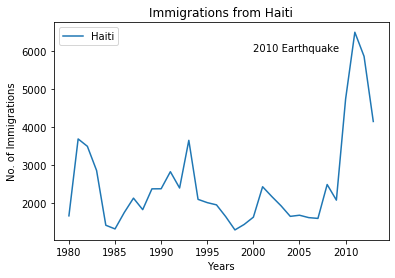

In [194]:
haiti.plot()
plt.xlabel('Years')
plt.ylabel('No. of Immigrations')
plt.title('Immigrations from Haiti')
plt.text(20,6000,'2010 Earthquake')
plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. 